In [163]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [179]:
# checking all the tables in the dataset
connection = sqlite3.connect('database.sqlite')

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""",connection)

tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...
8,table,attribute_imp,attribute_imp,305672,"CREATE TABLE ""attribute_imp"" (\n""index"" INTEGE..."


In [142]:
#extracting player details from player table
playerdetails = pd.read_sql("""SELECT * FROM Player;""", connection)


In [143]:
#extracting player attribute from Player_Attributes table
playerattribute = pd.read_sql("""SELECT * FROM Player_Attributes;""", connection)
playerattribute.shape
#playerattribute.head()


(183978, 42)

In [9]:
#playerattribute.info()

In [144]:
playerattribute['date'] = pd.to_datetime(playerattribute['date'])
#playerattribute.info()

In [145]:
# dropping null values from the table.
playerattribute.dropna(inplace=True)
playerattribute.shape
#playerattribute.info()

(180354, 42)

In [146]:
playerattribute.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [147]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
playerattribute.preferred_foot = encoder.fit_transform(playerattribute.preferred_foot)




cat = pd.Categorical(playerattribute.attacking_work_rate, categories=['low', 'medium', 'high'], ordered=True)
#cat.fillna('missing')
labels, unique = pd.factorize(cat, sort=True)
playerattribute.attacking_work_rate = labels

cat = pd.Categorical(playerattribute.defensive_work_rate, categories=['low', 'medium', 'high'], ordered=True)
#cat.fillna('missing')
labels, unique = pd.factorize(cat, sort=True)
playerattribute.defensive_work_rate = labels

playerattribute.head(100)
print(playerattribute.shape)



(180354, 42)


In [148]:
# preserving the original player attribute table and creating two new tables, one fro eda and one for running the models
rating = playerattribute["overall_rating"]
playerattribute_new = playerattribute
playerattribute_new = playerattribute_new.drop("id", axis = 1)
playerattribute_new = playerattribute_new.drop("player_fifa_api_id", axis = 1)
playerattribute_new = playerattribute_new.drop("player_api_id", axis = 1)
playerattribute_new = playerattribute_new.drop("date", axis = 1)
player_attribute_final = playerattribute_new.drop("overall_rating", axis = 1)
print(playerattribute.shape)
print(playerattribute_new.shape)
print(player_attribute_final.shape)


(180354, 42)
(180354, 38)
(180354, 37)


In [15]:
#print(rating)
#playerattribute_new.head()

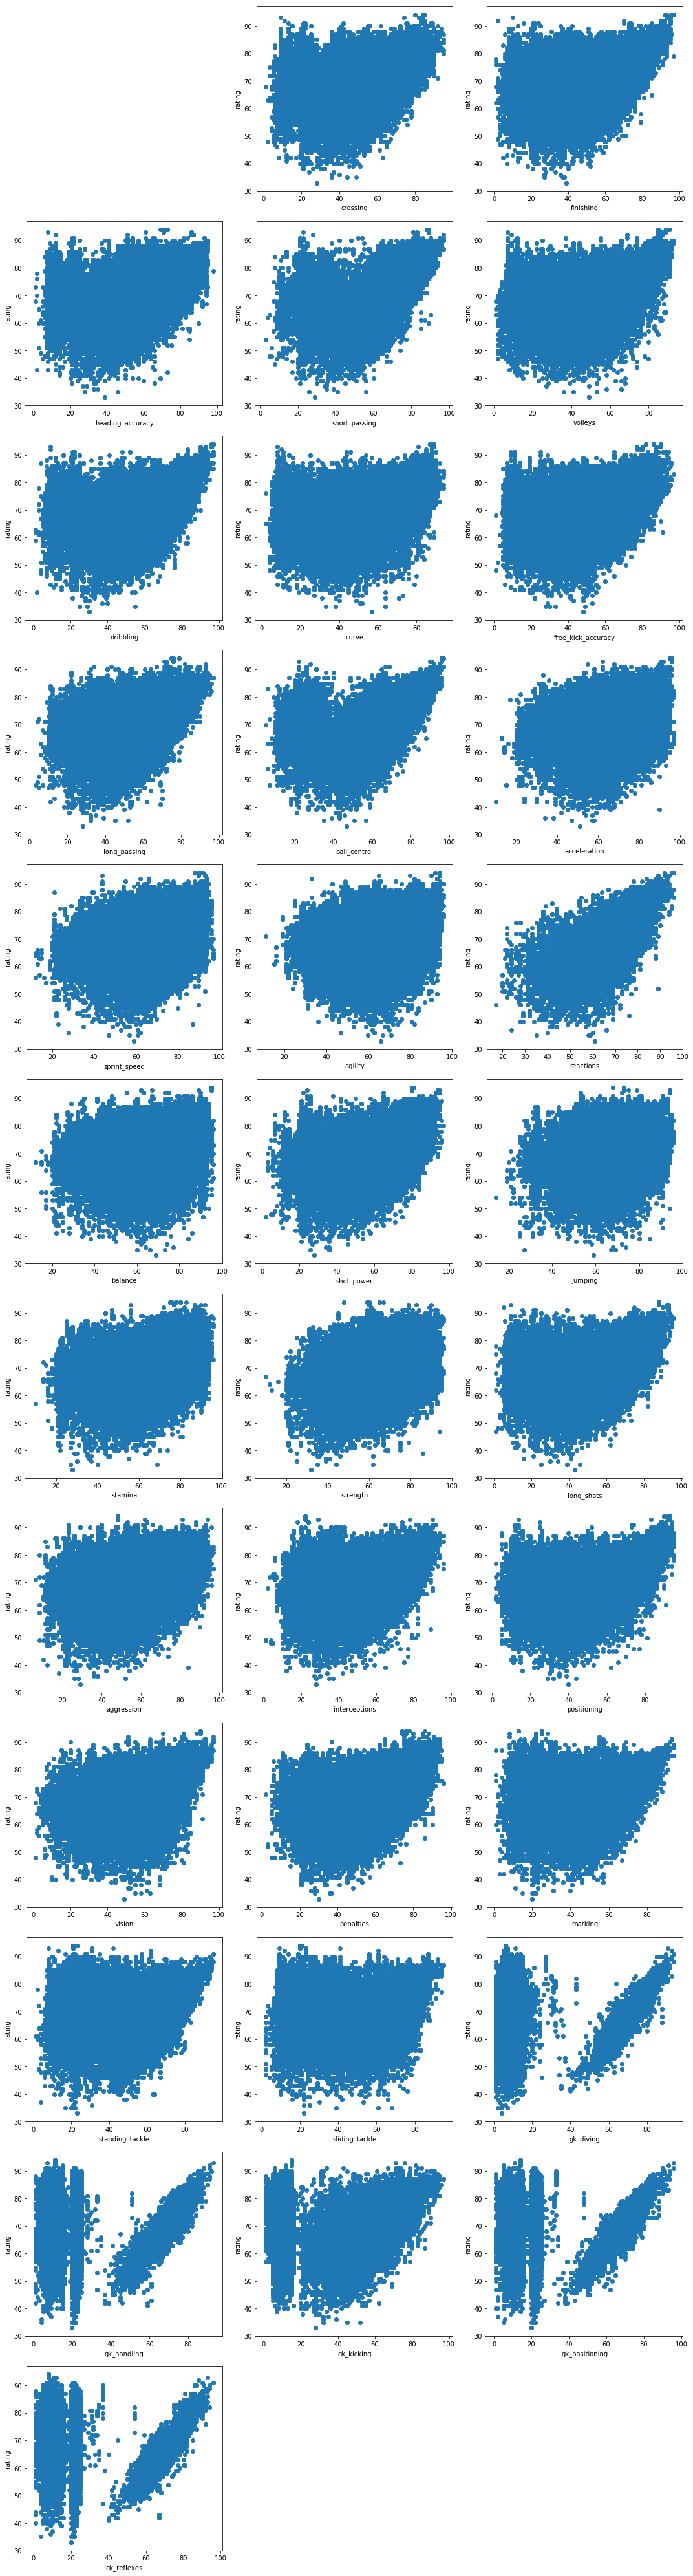

In [151]:
# scatter plots to analyze the relation between rating and individual skills
fig = plt.figure(figsize = (15,60))
for idx in range(4,37):
    feature = player_attribute_final.columns[idx]
    ax = fig.add_subplot(13,3,idx+1)
    Xtmp = player_attribute_final[feature]
    ax.scatter(Xtmp, rating)
    ax.set_xlabel(feature)
    ax.set_ylabel("rating")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Between rating and various Attributes')

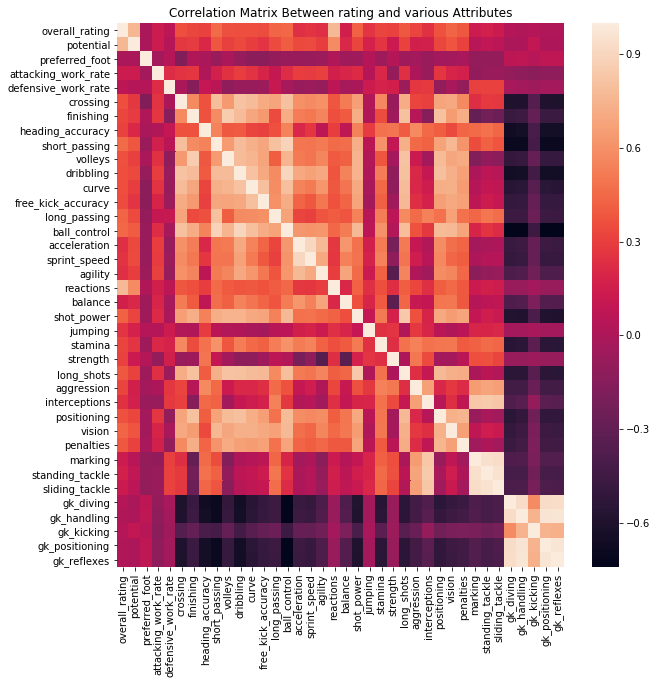

In [152]:
# Correlation matrix to analyze relationship between overall rating and other skills.
import seaborn as sns

plt.figure(figsize = (10,10))
corr = playerattribute_new.corr()
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)
ax.set_title("Correlation Matrix Between rating and various Attributes")

In [153]:
# Dropping potential table as it seems highly correlated and the meaning is intuitively similar.
player_attribute_final = player_attribute_final.drop("potential", axis = 1)
print(player_attribute_final.shape)

(180354, 36)


In [154]:
# Dropping reations table as it seems highly correlated and the meaning is intuitively similar.
player_attribute_final = player_attribute_final.drop("reactions", axis = 1)
print(player_attribute_final.shape)


(180354, 35)


In [155]:
# preparing the splitting the data into test and train sets 

from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(player_attribute_final, rating, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(126247, 35) (126247,)
(54107, 35) (54107,)


In [156]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.712262125695339

In [157]:
score = r2_score(y_test, predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')


Accuracy: 72.10 %


In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.3559234661826518

In [159]:
score = r2_score(y_test, predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')
# This high accuracy may be due to duplicate data of same players.
# Note, every player's data is repeated 10 12 times for different season. May be the data is getting duplicated and the same data is present in test as well as training set.

Accuracy: 96.28 %


In [160]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, predictions)
forest_rmse = np.sqrt(tree_mse)
forest_rmse



1.3559234661826518

In [161]:
score = r2_score(y_test, predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')
# This high accuracy may be due to duplicate data of same players.
# Note, every player's data is repeated 10 12 times for season. May be the data is getting duplicated and the same data is present in test as well as training set.

Accuracy: 98.19 %


In [77]:
# dropping the duplicate data

player_attribute_final_nodup = playerattribute
rating_nodup = playerattribute["overall_rating"]
print(player_attribute_final_nodup.shape)
player_attribute_final_nodup = player_attribute_final_nodup.drop_duplicates(subset =['player_api_id',], keep = "first", inplace = False) 
print(player_attribute_final_nodup.shape)
player_attribute_final_nodup = player_attribute_final_nodup.drop("id", axis = 1)
player_attribute_final_nodup = player_attribute_final_nodup.drop("player_fifa_api_id", axis = 1)
player_attribute_final_nodup = player_attribute_final_nodup.drop("player_api_id", axis = 1)
player_attribute_final_nodup = player_attribute_final_nodup.drop("date", axis = 1)
player_attribute_final_nodup = player_attribute_final_nodup.drop("overall_rating", axis = 1)
player_attribute_final_nodup = player_attribute_final_nodup.drop("potential", axis = 1)
player_attribute_final_nodup = player_attribute_final_nodup.drop("reactions", axis = 1)
print(player_attribute_final_nodup.shape)

X_train_nodup, X_test_nodup, y_train_nodup, y_test_nodup = train_test_split(player_attribute_final_nodup, rating_nodup, test_size=0.3)
print (X_train_nodup.shape, y_train_nodup.shape)
print (X_test_nodup.shape, y_test_nodup.shape)


(10410, 42)
(10410, 42)
(10410, 35)
(7287, 35) (7287,)
(3123, 35) (3123,)


In [83]:
lm_nodup = linear_model.LinearRegression()
model_nodup = lm_nodup.fit(X_train_nodup, y_train_nodup)
predictions_nodup = lm_nodup.predict(X_test_nodup)
lin_mse_nodup = mean_squared_error(y_test_nodup, predictions_nodup)
lin_rmse_nodup = np.sqrt(lin_mse_nodup)
print ( 'error:', lin_rmse_nodup)
score = r2_score(y_test_nodup, predictions_nodup)  
print('Accuracy:',format(score*100,'.2f'),'%')

error: 3.5382583123348152
Accuracy: 68.02 %


In [88]:
tree_reg_nodup = DecisionTreeRegressor(random_state=42)
tree_reg_nodup.fit(X_train_nodup, y_train_nodup)
predictions_nodup_t = tree_reg_nodup.predict(X_test_nodup)
tree_mse_nodup = mean_squared_error(y_test_nodup, predictions_nodup_t)
tree_rmse_nodup = np.sqrt(tree_mse_nodup)
print ( 'error:', tree_rmse_nodup)
score = r2_score(y_test_nodup, predictions_nodup_t)  
print('Accuracy:',format(score*100,'.2f'),'%')



error: 2.3949594843747044
Accuracy: 85.35 %


In [89]:
forest_reg_nodup = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg_nodup.fit(X_train_nodup, y_train_nodup)
predictions_nodup = forest_reg_nodup.predict(X_test_nodup)
forest_mse_nodup = mean_squared_error(y_test_nodup, predictions_nodup)
forest_rmse_nodup = np.sqrt(forest_mse_nodup)
print ( 'error:', forest_mse_nodup)
score = r2_score(y_test_nodup, predictions_nodup)  
print('Accuracy:',format(score*100,'.2f'),'%')

error: 2.2431790585975024
Accuracy: 94.27 %


In [181]:
# Apart from player attributes we have player table which has some more potential features, let us anayalze if 
# they are related to overall rating or not.
# we have birthday , height and weight. We will convert birthday into age using date recored in player attribute table.

X1 = pd.read_sql("""SELECT  pl.player_api_id, pl.birthday,pl.height,pl.weight,pa.date, pa.overall_rating,
                           pa.preferred_foot, pa.attacking_work_rate, pa.defensive_work_rate,
                           pa.crossing, pa.finishing, pa.heading_accuracy, pa.short_passing
,pa.volleys
,pa.dribbling
,pa.curve
,pa.free_kick_accuracy
,pa.long_passing
,pa.ball_control
,pa.acceleration
,pa.sprint_speed
,pa.agility
,pa.reactions
,pa.balance
,pa.shot_power
,pa.jumping
,pa.stamina
,pa.strength
,pa.long_shots
,pa.aggression
,pa.interceptions
,pa.positioning
,pa.vision
,pa.penalties
,pa.marking
,pa.standing_tackle
,pa.sliding_tackle
,pa.gk_diving
,pa.gk_handling
,pa.gk_kicking
,pa.gk_positioning
,pa.gk_reflexes
                           FROM player pl
                           JOIN player_Attributes pa
                           ON pl.player_api_id = pa.player_api_id;""",connection)

X1['date'] = pd.to_datetime(X1['date'])
X1['birthday'] = pd.to_datetime(X1['birthday'])

X1.to_sql("player_imp_attributes",connection,if_exists="replace")


In [182]:
print(X1.shape)
print(X1.head())

(183978, 42)
   player_api_id   birthday  height  weight       date  overall_rating  \
0         505942 1992-02-29  182.88     187 2016-02-18            67.0   
1         505942 1992-02-29  182.88     187 2015-11-19            67.0   
2         505942 1992-02-29  182.88     187 2015-09-21            62.0   
3         505942 1992-02-29  182.88     187 2015-03-20            61.0   
4         505942 1992-02-29  182.88     187 2007-02-22            61.0   

  preferred_foot attacking_work_rate defensive_work_rate  crossing  ...  \
0          right              medium              medium      49.0  ...   
1          right              medium              medium      49.0  ...   
2          right              medium              medium      49.0  ...   
3          right              medium              medium      48.0  ...   
4          right              medium              medium      48.0  ...   

   vision  penalties  marking  standing_tackle  sliding_tackle  gk_diving  \
0    54.0     

In [183]:

#Keeping most recent record of each player
X1.drop_duplicates(subset=['player_api_id',],keep="first",inplace=True)
X1.dropna(inplace=True)
X1.to_sql("player_imp_attributes",connection,if_exists="replace")

X1.shape

(10410, 42)

In [184]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10410 entries, 0 to 183968
Data columns (total 42 columns):
player_api_id          10410 non-null int64
birthday               10410 non-null datetime64[ns]
height                 10410 non-null float64
weight                 10410 non-null int64
date                   10410 non-null datetime64[ns]
overall_rating         10410 non-null float64
preferred_foot         10410 non-null object
attacking_work_rate    10410 non-null object
defensive_work_rate    10410 non-null object
crossing               10410 non-null float64
finishing              10410 non-null float64
heading_accuracy       10410 non-null float64
short_passing          10410 non-null float64
volleys                10410 non-null float64
dribbling              10410 non-null float64
curve                  10410 non-null float64
free_kick_accuracy     10410 non-null float64
long_passing           10410 non-null float64
ball_control           10410 non-null float64
accelerat

In [185]:

#Calculate the age of player

# def num_years(start,curr):
#     return(int((curr-start).days / 365.25))

# query = pd.read_sql("""SELECT * FROM player_imp_attributes;""",connection)
# query['date'] = pd.to_datetime(query['date'])
# query['birthday'] = pd.to_datetime(query['birthday'])
# #query['age'] = (query['date'].dt.year)-(query['birthday'].dt.year)
# query['age'] = query.apply(lambda x: num_years(x['birthday'], x['date']), axis = 1)

# query.to_sql("player_imp_attributes",connection,if_exists="replace")

#Calculate the age of player

def num_years(birth,current):
    return(int((current-birth).days / 365.25))

query = pd.read_sql("""SELECT * FROM player_imp_attributes;""",connection)
query['date'] = pd.to_datetime(query['date'])
query['birthday'] = pd.to_datetime(query['birthday'])
query['age'] = query.apply(lambda x: num_years(x['birthday'], x['date']), axis = 1)

query.to_sql("player_imp_attributes",connection,if_exists="replace")

In [186]:
X = pd.read_sql("""SELECT *
                        FROM player_imp_attributes limit 10;""", connection)

X

,level_0,index,player_api_id,birthday,height,weight,date,overall_rating,preferred_foot,attacking_work_rate,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
0,0,0,505942,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,right,medium,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,23
1,1,5,155782,1989-12-15 00:00:00,170.18,146,2016-04-21 00:00:00,74.0,left,high,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,26
2,2,38,162549,1991-05-13 00:00:00,170.18,163,2016-01-07 00:00:00,65.0,right,medium,...,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0,24
3,3,64,30572,1982-05-08 00:00:00,182.88,198,2016-04-21 00:00:00,69.0,right,medium,...,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0,33
4,4,87,23780,1979-11-08 00:00:00,182.88,154,2015-12-24 00:00:00,70.0,right,medium,...,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0,36
5,5,112,27316,1986-09-04 00:00:00,182.88,161,2016-04-28 00:00:00,77.0,left,medium,...,81.0,28.0,34.0,35.0,15.0,12.0,7.0,16.0,15.0,29
6,6,139,564793,1996-01-30 00:00:00,172.72,146,2016-04-21 00:00:00,61.0,right,medium,...,42.0,52.0,58.0,57.0,8.0,13.0,14.0,14.0,15.0,20
7,7,146,30895,1987-04-16 00:00:00,165.10,139,2015-10-16 00:00:00,77.0,right,high,...,62.0,30.0,34.0,35.0,14.0,7.0,7.0,16.0,11.0,28
8,8,172,528212,1993-02-19 00:00:00,190.50,181,2016-02-25 00:00:00,48.0,right,medium,...,41.0,15.0,15.0,12.0,53.0,41.0,39.0,51.0,53.0,23
9,9,179,101042,1987-10-28 00:00:00,175.26,170,2015-12-03 00:00:00,69.0,left,medium,...,56.0,67.0,68.0,65.0,7.0,15.0,7.0,10.0,15.0,28


Text(0.5, 1.0, 'Correlation Matrix Between Age and Various Attributes')

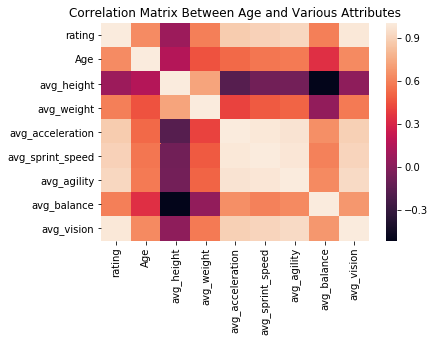

In [187]:

import seaborn as sns
query1 = pd.read_sql("""  SELECT overall_rating AS rating, 
                          age AS Age,
                          AVG(height) AS avg_height,
                          AVG(weight) AS avg_weight,
                          AVG(acceleration) AS avg_acceleration,
                          AVG(sprint_speed) AS avg_sprint_speed,
                          AVG(agility) AS avg_agility, 
                          AVG(balance) AS avg_balance,
                          AVG(vision) AS avg_vision
                          FROM player_imp_attributes
                          GROUP BY 1
                          ORDER BY 1""",connection)
corr = query1.corr()
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)
ax.set_title("Correlation Matrix Between Age and Various Attributes")

Text(0.5, 1.0, 'Overall vs age')

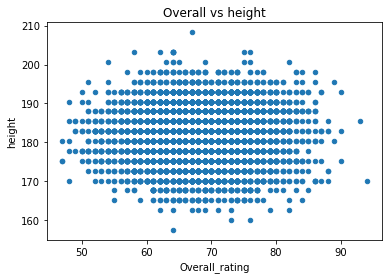

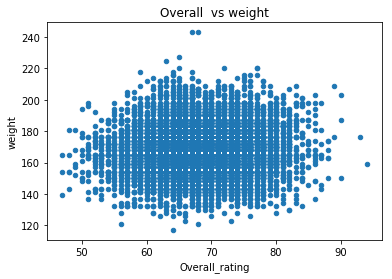

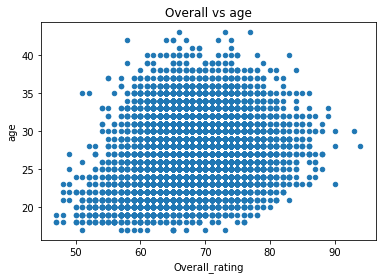

In [188]:
qu = pd.read_sql("""  SELECT overall_rating AS Overall_rating, height AS height, weight AS weight,
                        age as age FROM player_imp_attributes
                        ORDER BY 1""",connection)

ax = qu.plot(x="Overall_rating",y="height",kind="scatter")
ax.set_title("Overall vs height")

ax = qu.plot(x="Overall_rating",y="weight",kind="scatter")
ax.set_title("Overall  vs weight")

ax = qu.plot(x="Overall_rating",y="age",kind="scatter")
ax.set_title("Overall vs age")



Correlation of Age with rating:  0.6399987434966958
Correlation of Reactions with rating:  0.9942900695657751
Correlation of Stamina with rating:  0.9375913984158036
Correlation of Acceleration with rating:  0.872280484320778
Correlation of Sprint Speed with rating:  0.8985227151292864
Correlation of Agility with rating:  0.9191905033913698
Correlation of Agility with rating:  0.5933987992543197
Correlation of Agility with rating:  0.9848957123212932


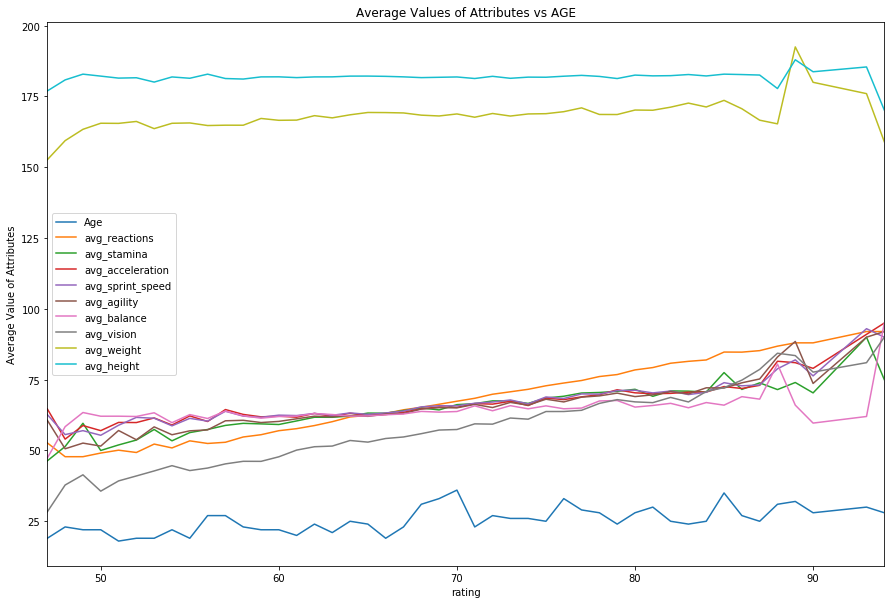

In [189]:
#This is where we plot
query1 = pd.read_sql("""  SELECT overall_rating as rating , age AS Age,AVG(reactions) AS avg_reactions,AVG(stamina) AS avg_stamina
                          ,AVG(acceleration) AS avg_acceleration,AVG(sprint_speed) AS avg_sprint_speed
                          ,AVG(agility) AS avg_agility, AVG(balance) AS avg_balance, AVG(vision) AS avg_vision,
                          AVG (height) as avg_height, AVG (weight) as avg_weight
                          FROM player_imp_attributes
                          GROUP BY 1
                          ORDER BY 1""",connection)
ax = query1.plot(x="rating", y=["Age", "avg_reactions", "avg_stamina", "avg_acceleration","avg_sprint_speed","avg_agility","avg_balance","avg_vision", "avg_weight" , "avg_height"], kind="line",figsize=(15,10))

ax.set_ylabel("Average Value of Attributes")
ax.set_title("Average Values of Attributes vs AGE")
print("Correlation of Age with rating: ",query1['rating'].corr(query1['Age']))
print("Correlation of Reactions with rating: ",query1['rating'].corr(query1['avg_reactions']))
print("Correlation of Stamina with rating: ",query1['rating'].corr(query1['avg_stamina']))
print("Correlation of Acceleration with rating: ",query1['rating'].corr(query1['avg_acceleration']))
print("Correlation of Sprint Speed with rating: ",query1['rating'].corr(query1['avg_sprint_speed']))
print("Correlation of Agility with rating: ",query1['rating'].corr(query1['avg_agility']))
print("Correlation of Agility with rating: ",query1['rating'].corr(query1['avg_balance']))
print("Correlation of Agility with rating: ",query1['rating'].corr(query1['avg_vision']))

,Preferred_Foot,Number_of_Players
0,left,2546
1,right,7864


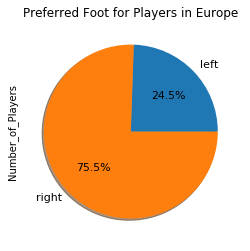

In [190]:
# just checking how may left footed players are there.
query = pd.read_sql("""SELECT preferred_foot AS Preferred_Foot,COUNT(*) as Number_of_Players 
                        FROM player_imp_attributes
                        GROUP BY 1""",connection)




ax = query.plot(kind="pie",y='Number_of_Players', autopct='%1.1f%%',
 startangle=0, shadow=True, labels=query['Preferred_Foot'], legend = False, fontsize=11)


ax.set_title("Preferred Foot for Players in Europe")
query